Características más importantes en el modelo:
  feature  importance
1      ao    0.626062
3     mes    0.216970
4     año    0.060957
0      UI    0.049184
2     dia    0.046827


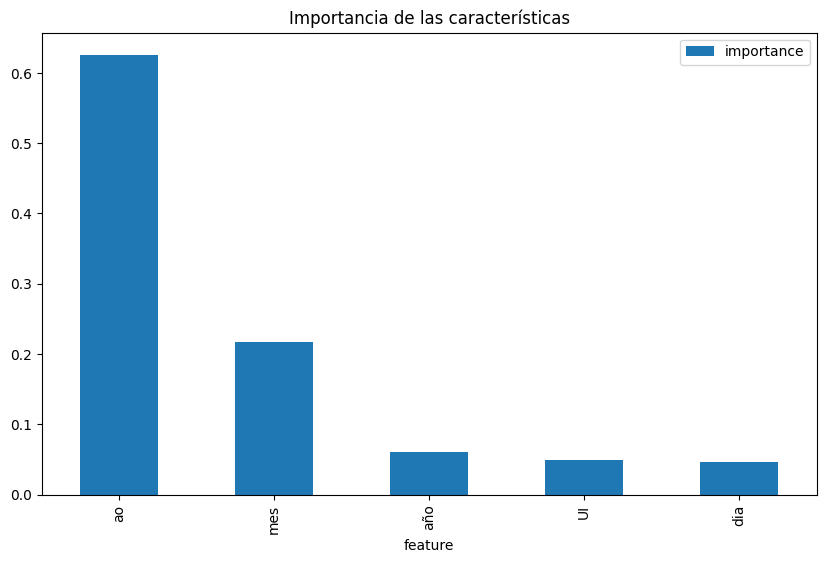

Precisión Árbol de Decisión: 98.92%


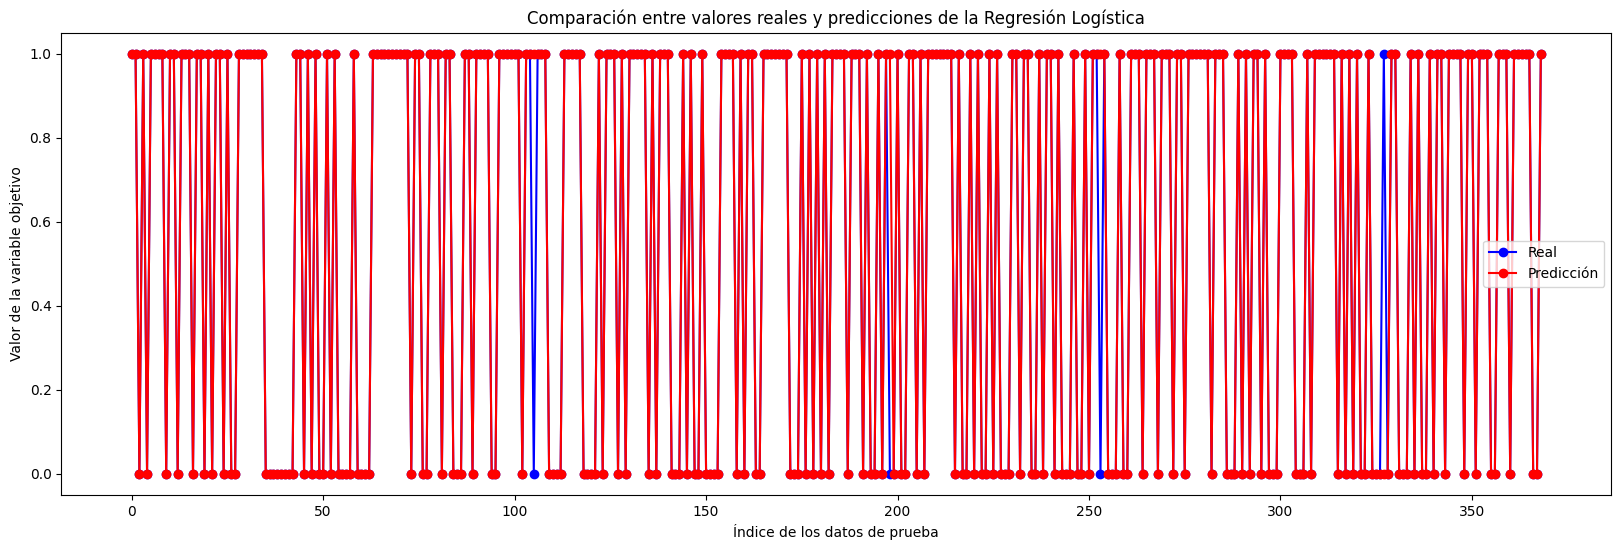

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('../data/processed/resultado5.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data['fecha'] = pd.to_datetime(data['fecha'])

# Dividir los datos en características (X) y etiquetas (y)
X = data[['fecha', 'UI','ao']]
y = data['abierto/cerrado']

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
X['dia'] = X['fecha'].dt.day
X['mes'] = X['fecha'].dt.month
X['año'] = X['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
X = X.drop('fecha', axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar filas con valores NaN en los conjuntos de entrenamiento y prueba
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Asegurarse de que y_train tenga la misma longitud que X_train

X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Asegurarse de que y_test tenga la misma longitud que X_test

# Luego, puedes proceder con el entrenamiento y evaluación de los modelos.

from sklearn.ensemble import RandomForestClassifier
# Crear el modelo
decision_tree = RandomForestClassifier(random_state=14)


# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Características más importantes
feature_importances = decision_tree.feature_importances_
feature_names = X_train.columns

# Crear un dataframe con las características y sus importancias
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Ordenar el dataframe por importancia
importance_df = importance_df.sort_values(by='importance', ascending=False)

print("Características más importantes en el modelo:")
print(importance_df)

# Opcional: Graficar las importancias de las características
importance_df.plot.bar(x='feature', y='importance', figsize=(10, 6))
plt.title('Importancia de las características')
plt.show()

# Hacer predicciones
y_pred = decision_tree.predict(X_test)



# Calcular la precisión
precision_decision_tree = accuracy_score(y_test, y_pred)
print(f"Precisión Árbol de Decisión: {precision_decision_tree * 100:.2f}%")

# Graficar la diferencia entre valores reales y predicciones de la Regresión Logística
plt.figure(figsize=(20, 6))

# Graficar valores reales y predicciones
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones de la Regresión Logística')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()


In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar la precisión en los datos de entrenamiento
y_train_pred = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Precisión en los datos de entrenamiento: {train_accuracy * 100:.2f}%")

# Evaluar la precisión en los datos de prueba
y_test_pred = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Precisión en los datos de prueba: {test_accuracy * 100:.2f}%")

# Ver si hay una gran diferencia entre las dos precisiones
if abs(train_accuracy - test_accuracy) > 0.1:
    print("El modelo puede estar sobreajustado o subajustado.")

# Mostrar la matriz de confusión y el informe de clasificación
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_test_pred))
print("\nInforme de clasificación:")
print(classification_report(y_test, y_test_pred))


Precisión en los datos de entrenamiento: 100.00%
Precisión en los datos de prueba: 98.92%
Matriz de confusión:
[[154   3]
 [  1 211]]

Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       157
         1.0       0.99      1.00      0.99       212

    accuracy                           0.99       369
   macro avg       0.99      0.99      0.99       369
weighted avg       0.99      0.99      0.99       369



In [3]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)

print(f"Precisión media de validación cruzada: {cv_scores.mean() * 100:.2f}%")
print(f"Desviación estándar de validación cruzada: {cv_scores.std() * 100:.2f}%")


Precisión media de validación cruzada: 96.88%
Desviación estándar de validación cruzada: 0.54%


In [4]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y valores a probar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Realizar la optimización
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Mejor modelo
best_model = grid_search.best_estimator_


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [5]:
data2 = pd.read_csv('../data/processed/resultado5_1m.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)

data3 = pd.read_csv('../data/processed/resultado5_1m.csv')

y_test_custom = data3['abierto/cerrado']

# Evaluar el modelo optimizado en los datos de prueba
y_test_pred = best_model.predict(data2)
test_accuracy = accuracy_score(y_test_custom, y_test_pred)

print(f"Precisión en los datos de prueba: {test_accuracy * 100:.2f}%")


Precisión en los datos de prueba: 48.39%


Precisión de las predicciones en el conjunto de prueba: 48.39%


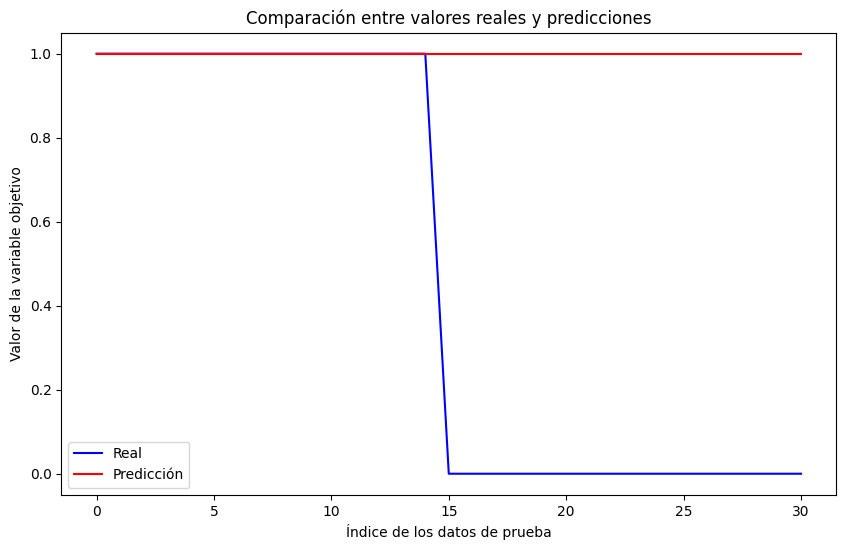

In [6]:
# # Fecha específica para la predicción
# fecha_especifica = '2020-7-20'
# 
# # Convertir la fecha a formato datetime
# fecha_especifica = pd.to_datetime(fecha_especifica)
# 
# # Extraer el día, mes y año de la fecha específica
# dia = fecha_especifica.day
# mes = fecha_especifica.month
# año = fecha_especifica.year
# 
# # Crear un DataFrame con las características para la fecha específica
# # El orden de las columnas y los nombres deben coincidir con los de X_train
# fecha_df = pd.DataFrame({
#     'UI': [0],  # Si no tienes datos de UI para la fecha específica, puedes usar un valor predeterminado
#     'dia': [dia],
#     'mes': [mes],
#     'año': [año]
# }, columns=X_train.columns)  # Utilizar las mismas columnas que X_train

# Cargar el dataset
data2 = pd.read_csv('../data/processed/resultado5_1m.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)
# Realizar la predicción usando el modelo entrenado
prediccion = decision_tree.predict(data2)

probabilidades = decision_tree.predict_proba(data2)

data3 = pd.read_csv('../data/processed/resultado5_1m.csv')

y_test_custom = data3['abierto/cerrado']

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

Precisión de las predicciones en el conjunto de prueba: 54.84%


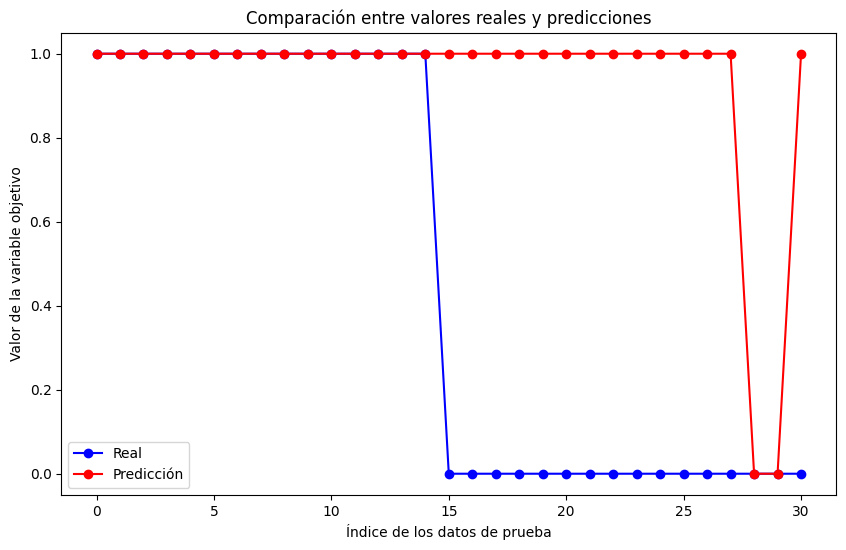

In [7]:
# # Fecha específica para la predicción
# fecha_especifica = '2020-7-20'
# 
# # Convertir la fecha a formato datetime
# fecha_especifica = pd.to_datetime(fecha_especifica)
# 
# # Extraer el día, mes y año de la fecha específica
# dia = fecha_especifica.day
# mes = fecha_especifica.month
# año = fecha_especifica.year
# 
# # Crear un DataFrame con las características para la fecha específica
# # El orden de las columnas y los nombres deben coincidir con los de X_train
# fecha_df = pd.DataFrame({
#     'UI': [0],  # Si no tienes datos de UI para la fecha específica, puedes usar un valor predeterminado
#     'dia': [dia],
#     'mes': [mes],
#     'año': [año]
# }, columns=X_train.columns)  # Utilizar las mismas columnas que X_train

# Cargar el dataset
data2 = pd.read_csv('../data/processed/resultado5_1m.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

data2 = data2.drop('abierto/cerrado', axis=1)
# Realizar la predicción usando el modelo entrenado

from sklearn.tree import DecisionTreeClassifier
# Crear el modelo
decision_tree = DecisionTreeClassifier(random_state=14)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

prediccion = decision_tree.predict(data2)

probabilidades = decision_tree.predict_proba(data2)

data3 = pd.read_csv('../data/processed/resultado5_1m.csv')

y_test_custom = data3['abierto/cerrado']

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-', marker='o')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()

Epoch 1/50


C:\Users\rmarc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - accuracy: 0.5467 - loss: 25.5767 
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.7808 - loss: 2.5523
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.8252 - loss: 2.3491
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8524 - loss: 1.8302
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8421 - loss: 2.2792
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8558 - loss: 2.8862
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.8426 - loss: 2.3665
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8267 - loss: 4.1477
Epoch 9/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.8632 - loss: 3.7075
Epoch 10/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8805 - loss: 1.6624 
Epoch 11/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8821 - loss: 1.9691
Epoch 12/50
148/148 ━━━━━━━━━━━━━━━━━━

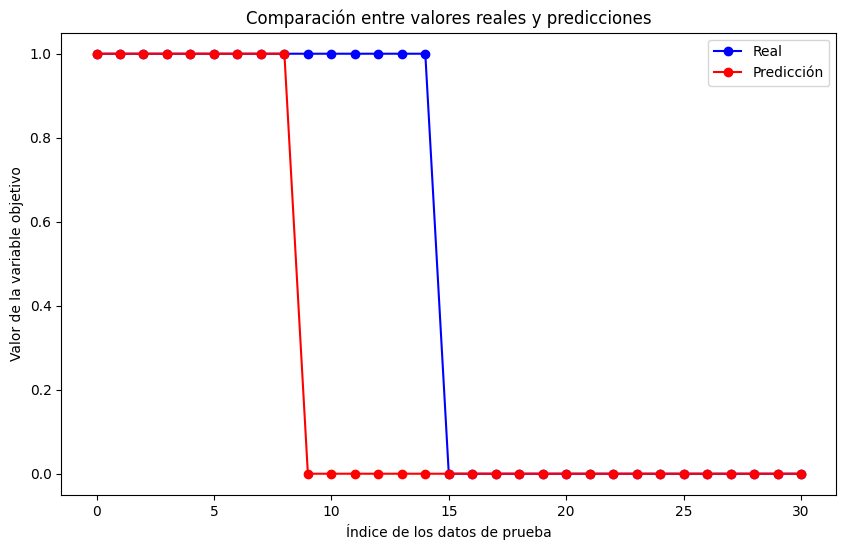

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Cargar el dataset
data2 = pd.read_csv('../data/processed/resultado5_1m.csv')  # Reemplaza 'tu_ruta_al_archivo.csv' con la ruta a tu archivo de datos

# Convertir la columna 'fecha' a formato de fecha
data2['fecha'] = pd.to_datetime(data2['fecha'])

# Convertir la columna 'fecha' a características numéricas (día, mes y año)
data2['dia'] = data2['fecha'].dt.day
data2['mes'] = data2['fecha'].dt.month
data2['año'] = data2['fecha'].dt.year

# Eliminar la columna original 'fecha' ya que se ha convertido en características numéricas
data2 = data2.drop('fecha', axis=1)

# Eliminar la columna 'abierto/cerrado' ya que no se necesita en las características para la predicción
data2 = data2.drop('abierto/cerrado', axis=1)

# Escalar las características
scaler = StandardScaler()
data2_scaled = scaler.fit_transform(data2)

# Cargar de nuevo el dataset para obtener y_train y y_test_custom
data3 = pd.read_csv('../data/processed/resultado5_1m.csv')
y_test_custom = data3['abierto/cerrado']

# Crear el modelo de la Red Neuronal Artificial (RNA)
model = Sequential()
model.add(Dense(32, input_dim=data2_scaled.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Realizar la predicción usando el modelo entrenado
prediccion = model.predict(data2_scaled)
prediccion = (prediccion > 0.5).astype(int).flatten()

# Calcular la precisión
precision_custom = accuracy_score(y_test_custom, prediccion)
print(f"Precisión de las predicciones en el conjunto de prueba: {precision_custom * 100:.2f}%")

plt.figure(figsize=(10, 6))

# Graficar valores reales
plt.plot(y_test_custom.values, label='Real', color='blue', linestyle='-', marker='o')

# Graficar predicciones
plt.plot(prediccion, label='Predicción', color='red', linestyle='-', marker='o')

# Configurar el gráfico
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Índice de los datos de prueba')
plt.ylabel('Valor de la variable objetivo')
plt.legend()

# Mostrar el gráfico
plt.show()
